In [2]:
import pandas as pd
import numpy as np
peliculas = pd.read_csv('imdb_top_1000.csv')
peliculas  

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [3]:
peliculas['Gross'] = peliculas['Gross'].replace({',': ''}, regex=True)
peliculas['Gross'] = peliculas['Gross'].replace(np.nan, 0)
peliculas['Gross'] = peliculas['Gross'].astype(int)

Matplotlib

In [4]:
import matplotlib.pyplot as plt

Seleccionamos el estilo desde https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html

In [5]:
plt.style.use('fast')


Barplot

In [6]:
group1 = peliculas.sort_values(by='Gross', ascending = False).head(10)
group1

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
477,https://m.media-amazon.com/images/M/MV5BOTAzOD...,Star Wars: Episode VII - The Force Awakens,2015,U,138 min,"Action, Adventure, Sci-Fi",7.9,"As a new threat to the galaxy rises, Rey, a de...",80.0,J.J. Abrams,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,860823,936662225
59,https://m.media-amazon.com/images/M/MV5BMTc5MD...,Avengers: Endgame,2019,UA,181 min,"Action, Adventure, Drama",8.4,After the devastating events of Avengers: Infi...,78.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Evans,Mark Ruffalo,809955,858373000
623,https://m.media-amazon.com/images/M/MV5BMTYwOT...,Avatar,2009,UA,162 min,"Action, Adventure, Fantasy",7.8,A paraplegic Marine dispatched to the moon Pan...,83.0,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez,1118998,760507625
60,https://m.media-amazon.com/images/M/MV5BMjMxNj...,Avengers: Infinity War,2018,UA,149 min,"Action, Adventure, Sci-Fi",8.4,The Avengers and their allies must be willing ...,68.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,834477,678815482
652,https://m.media-amazon.com/images/M/MV5BMDdmZG...,Titanic,1997,UA,194 min,"Drama, Romance",7.8,A seventeen-year-old aristocrat falls in love ...,75.0,James Cameron,Leonardo DiCaprio,Kate Winslet,Billy Zane,Kathy Bates,1046089,659325379
357,https://m.media-amazon.com/images/M/MV5BNDYxNj...,The Avengers,2012,UA,143 min,"Action, Adventure, Sci-Fi",8.0,Earth's mightiest heroes must come together an...,69.0,Joss Whedon,Robert Downey Jr.,Chris Evans,Scarlett Johansson,Jeremy Renner,1260806,623279547
891,https://m.media-amazon.com/images/M/MV5BMTEzNz...,Incredibles 2,2018,UA,118 min,"Animation, Action, Adventure",7.6,The Incredibles family takes on a new mission ...,80.0,Brad Bird,Craig T. Nelson,Holly Hunter,Sarah Vowell,Huck Milner,250057,608581744
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
582,https://m.media-amazon.com/images/M/MV5BMjEwMz...,Rogue One,2016,UA,133 min,"Action, Adventure, Sci-Fi",7.8,The daughter of an Imperial scientist joins th...,65.0,Gareth Edwards,Felicity Jones,Diego Luna,Alan Tudyk,Donnie Yen,556608,532177324
63,https://m.media-amazon.com/images/M/MV5BMTk4OD...,The Dark Knight Rises,2012,UA,164 min,"Action, Adventure",8.4,Eight years after the Joker's reign of anarchy...,78.0,Christopher Nolan,Christian Bale,Tom Hardy,Anne Hathaway,Gary Oldman,1516346,448139099


<BarContainer object of 10 artists>

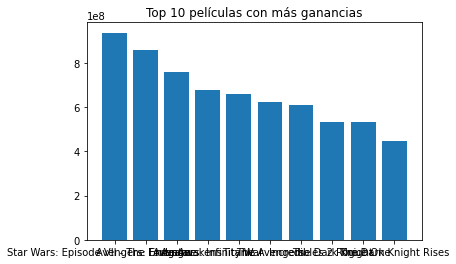

In [12]:
plt.title("Top 10 películas con más ganancias")
plt.bar(group1['Series_Title'], group1['Gross'])

Se ve muy feo, por lo cual es mejor poner los nombres en el eje y, para ello se usa bahr

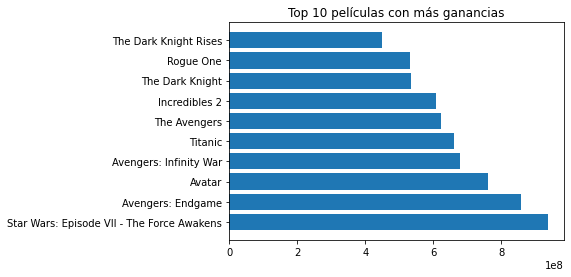

In [10]:
plt.title('Top 10 películas con más ganancias')
plt.barh(group1['Series_Title'], group1['Gross'], align='center')
plt.show()

Con el subplots es más personalisable

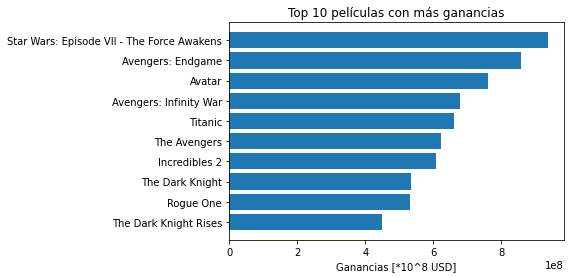

In [14]:
fig, ax = plt.subplots()
ax.barh(group1['Series_Title'], group1['Gross'], align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Ganancias [*10^8 USD]')
ax.set_title('Top 10 películas con más ganancias')
plt.show()

Histograma

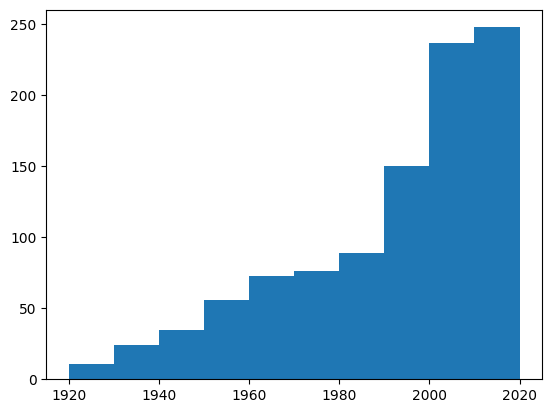

In [15]:
peliculas['Released_Year'] = pd.to_numeric(peliculas['Released_Year'], errors = 'coerce')
plt.style.use('default')
plt.hist(peliculas['Released_Year'])
plt.show()

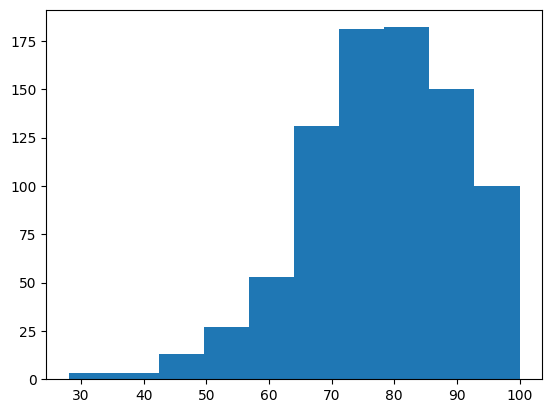

Released_Year   -0.939347
IMDB_Rating      1.016964
Meta_score      -0.605225
No_of_Votes      2.300011
Gross            3.410800
dtype: float64

In [24]:
plt.hist(peliculas['IMDB_Rating'], bins = 4, range = (8, 9)) #los bins es para poner la cantidad de barras para ver, default son 10
plt.show()
peliculas.skew()

(array([1.64705882, 1.51176471, 1.57647059, 0.39411765, 0.44117647,
        0.20588235, 0.02941176, 0.04705882, 0.01764706, 0.01176471]),
 array([7.6 , 7.77, 7.94, 8.11, 8.28, 8.45, 8.62, 8.79, 8.96, 9.13, 9.3 ]),
 <a list of 10 Patch objects>)

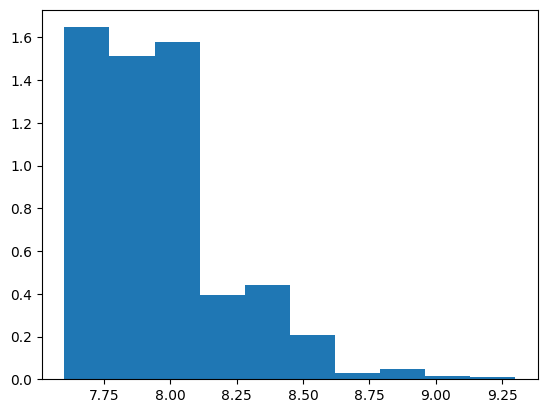

In [25]:
plt.hist(peliculas['IMDB_Rating'], density=True) #Retorna un gráfico de densidad con integral = 1

(array([ 280.,  537.,  805.,  872.,  947.,  982.,  987.,  995.,  998.,
        1000.]),
 array([7.6 , 7.77, 7.94, 8.11, 8.28, 8.45, 8.62, 8.79, 8.96, 9.13, 9.3 ]),
 <a list of 10 Patch objects>)

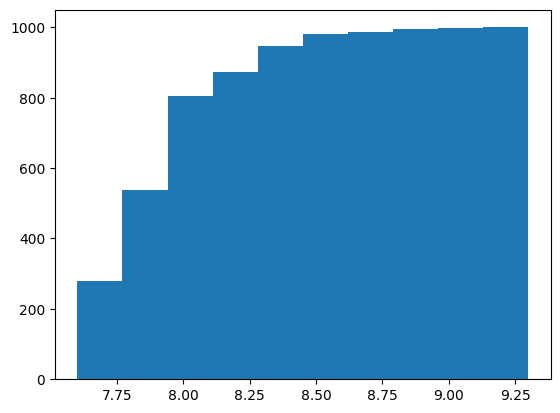

In [26]:
 plt.hist(peliculas['IMDB_Rating'], cumulative=True)

Otras opciones del histograma:

1. histtype: {'bar', 'barstacked', 'step', 'stepfilled'}, default: 'bar'
1. align: {'left', 'mid', 'right'}, default: 'mid'
1. orientation: {'vertical', 'horizontal'}, default: 'vertical'
1. log: bool, default: False
1. color: color or array-like of colors or None, default: None
1. stacked: bool, default: False


(array([280., 257., 268.,  67.,  75.,  35.,   5.,   8.,   3.,   2.]),
 array([7.6 , 7.77, 7.94, 8.11, 8.28, 8.45, 8.62, 8.79, 8.96, 9.13, 9.3 ]),
 <a list of 10 Patch objects>)

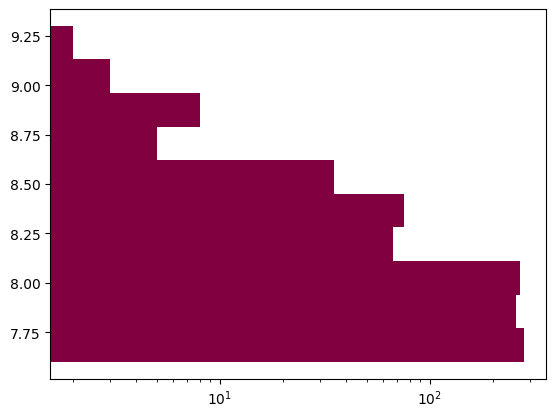

In [31]:
plt.hist(peliculas['IMDB_Rating'], orientation='horizontal', color = '#800040', log=True)

(array([[201.,  54.,  22.,   3.,   0.,   0.,   0.,   0.,   0.,   0.],
        [194.,  36.,  22.,   3.,   2.,   0.,   0.,   0.,   0.,   0.],
        [187.,  32.,  28.,  17.,   3.,   1.,   0.,   0.,   0.,   0.],
        [ 42.,  10.,   7.,   4.,   2.,   2.,   0.,   0.,   0.,   0.],
        [ 32.,  15.,   6.,  15.,   4.,   2.,   1.,   0.,   0.,   0.],
        [  7.,   3.,   7.,   4.,   6.,   6.,   2.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   1.,   2.,   0.,   1.,   1.,   0.,   0.],
        [  0.,   0.,   1.,   0.,   0.,   1.,   1.,   4.,   1.,   0.],
        [  0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]]),
 array([7.6 , 7.77, 7.94, 8.11, 8.28, 8.45, 8.62, 8.79, 8.96, 9.13, 9.3 ]),
 array([  25088. ,  256890.2,  488692.4,  720494.6,  952296.8, 1184099. ,
        1415901.2, 1647703.4, 1879505.6, 2111307.8, 2343110. ]),
 <matplotlib.collections.QuadMesh at 0x7fd947aa9310>)

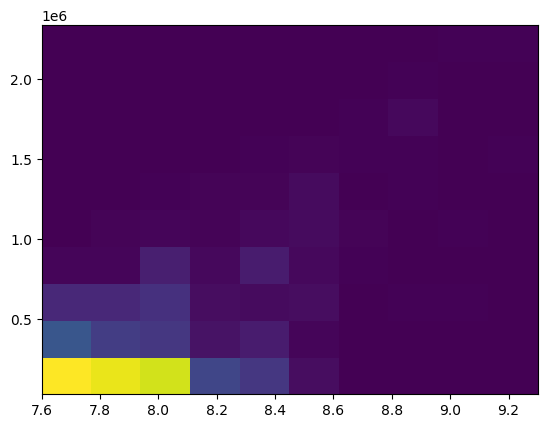

In [32]:
plt.hist2d(peliculas['IMDB_Rating'],peliculas['No_of_Votes'])

Boxplot

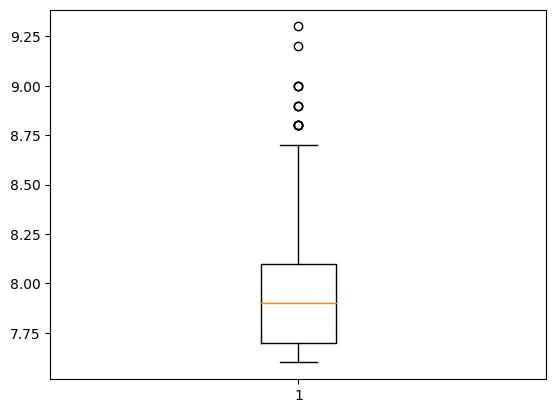

In [33]:
ratings = peliculas['IMDB_Rating']
plt.boxplot(ratings)
plt.show()

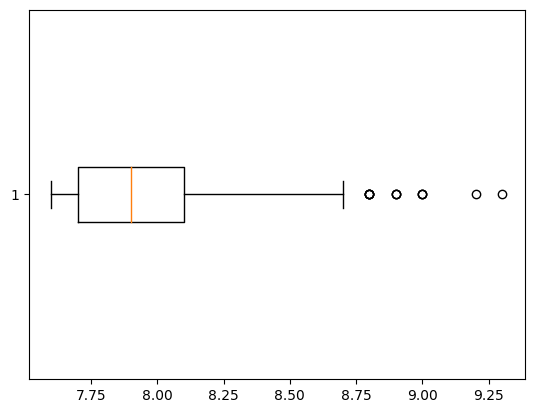

In [34]:
plt.boxplot(ratings, vert = False)
plt.show()

Gráfico de torta

In [38]:
directores = peliculas.groupby(peliculas['Director']).size().sort_values(ascending=False).head(7)
directores


Director
Alfred Hitchcock    14
Steven Spielberg    13
Hayao Miyazaki      11
Martin Scorsese     10
Akira Kurosawa      10
Billy Wilder         9
Stanley Kubrick      9
dtype: int64

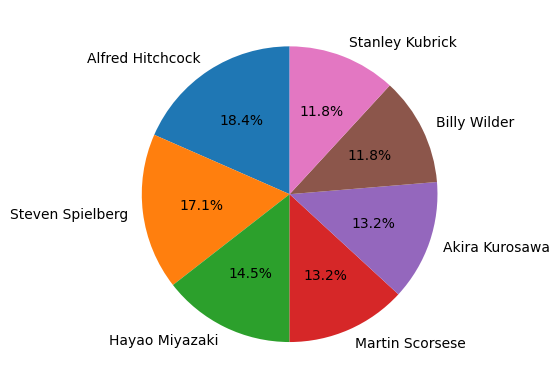

In [46]:
plt.pie(directores,labels=directores.keys(),  autopct='%1.1f%%', startangle=90)
plt.show()

Opciones:
1. explode: array-like, default: None
1. labels: list, default: None
1. colors: array-like, default: None
1. autopctNone or str or callable, default: None
1. pctdistance: float, default: 0.6
1. shadow: bool, default: False
1. normalize: None or bool, default: None
1. radius: float, default: 1
1. startangle: float, default: 0 degrees







([<matplotlib.patches.Wedge at 0x7fd9433a94d0>,
 [Text(-0.6563377823213264, 1.0045997787664118, 'Alfred Hitchcock'),
  Text(-1.587712928554509, -0.19790820220714472, 'Steven Spielberg'),
  Text(-0.483116245297245, -0.9882300812715086, 'Hayao Miyazaki'),
  Text(0.5623736134674058, -1.2820826490034147, 'Martin Scorsese'),
  Text(1.134980707321078, -0.3896393127097748, 'Akira Kurosawa'),
  Text(0.9882300473470507, 0.4831163146908269, 'Billy Wilder'),
  Text(0.7633665718886922, 1.956341349796325, 'Stanley Kubrick')],
 [Text(-0.3828637063541071, 0.5860165376137401, '18.4%'),
  Text(-1.091552638381225, -0.136061889017412, '17.1%'),
  Text(-0.2635179519803154, -0.5390345897844592, '14.5%'),
  Text(0.3615258943719037, -0.8241959886450523, '13.2%'),
  Text(0.6620720792706287, -0.22728959908070195, '13.2%'),
  Text(0.5390345712802094, 0.2635179898313601, '11.8%'),
  Text(0.5816126262009084, 1.4905457903210093, '11.8%')])

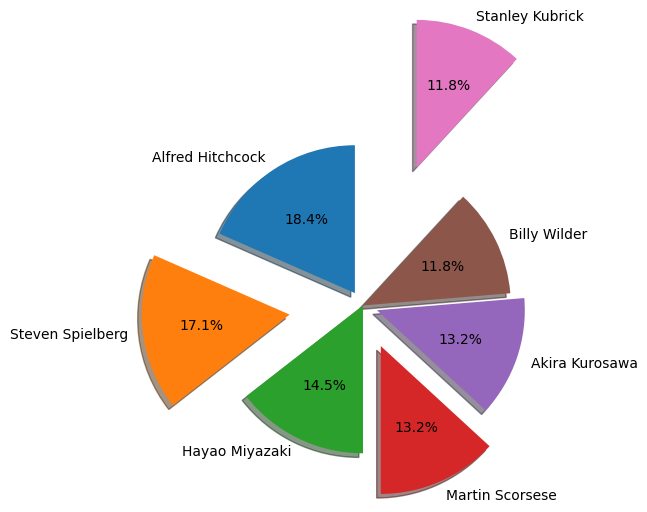

In [45]:
plt.pie(directores, explode=(0.1, 0.5, 0, 0.3, 0.1, 0, 1), labels=directores.keys(), autopct='%1.1f%%',shadow=True, startangle=90)


ACTIVIDAD

Desarrolle un gráfico de cada tipo enseñado en la ayudantía, no puede usar los mismos datos y a lo menos uno de los gráficos debe usar datos extraídos de un groupby.